In [1]:
%matplotlib inline

import sys
sys.path.append("..")

from src.regime_trading_pipeline import RegimeRotationStrategy
from src.performance_toolkit import RegimePerformanceToolkit

## Fit WK-means Model and Build Returns

In [2]:
growth = [
    "ADBE", "CRM", "LULU", "ORLY", "COST",
    "TMO", "LIN", "ACN", "MA", "V",
    "SPGI", "MCO", "DHR", "SHW", "INTU",
    "NFLX", "NOW", "SNPS", "ISRG", "CDNS",
]

# Retrieved from https://www.simplysafedividends.com/world-of-dividends/posts/939-20-best-recession-proof-dividend-stocks-for-a-2025-downturn
defensive = [
    "EPD", "VZ", "O", "GIS", "BMY",
    "KMB", "CVX", "PSA", "PEP", "XOM",
    "DUK", "ED", "GPC", "WEC", "LMT",
    "KO", "PG", "JNJ", "CL", "MCD",
]

strategy = RegimeRotationStrategy(
    growth_tickers=growth,
    defensive_tickers=defensive,
    start_date="2019-05-09",  # 5 yrs data (post covid)
    p_dim=2,                  # W2 distance
    window=360,               # approx. 15 days hourly return
    step=12,                  # half a day
    refit_every=48,           # refit MK-means every 24 days
    shift=True,               # avoid using future information
    # max_label_gap=10,         # smoothing transient gap between regimes
)

strategy.fit_kmeans()
strategy.build_returns()

## Backtest

### Aggressive Strategy

In [3]:
aggressive = strategy.backtest(
    allocations={
        0: {"growth": 1.0, "defensive": 0.0},
        1: {"growth": 0.5, "defensive": 0.5},
        2: {"growth": 0.0, "defensive": 1.0},
    },
)

toolkit = RegimePerformanceToolkit(aggressive)
toolkit.show_basic_info()

Start date: 2020-10-30
End date:   2025-10-30
Duration:   1826 

# of points in cluster 0 : 666
# of points in cluster 1 : 352
# of points in cluster 2 : 238


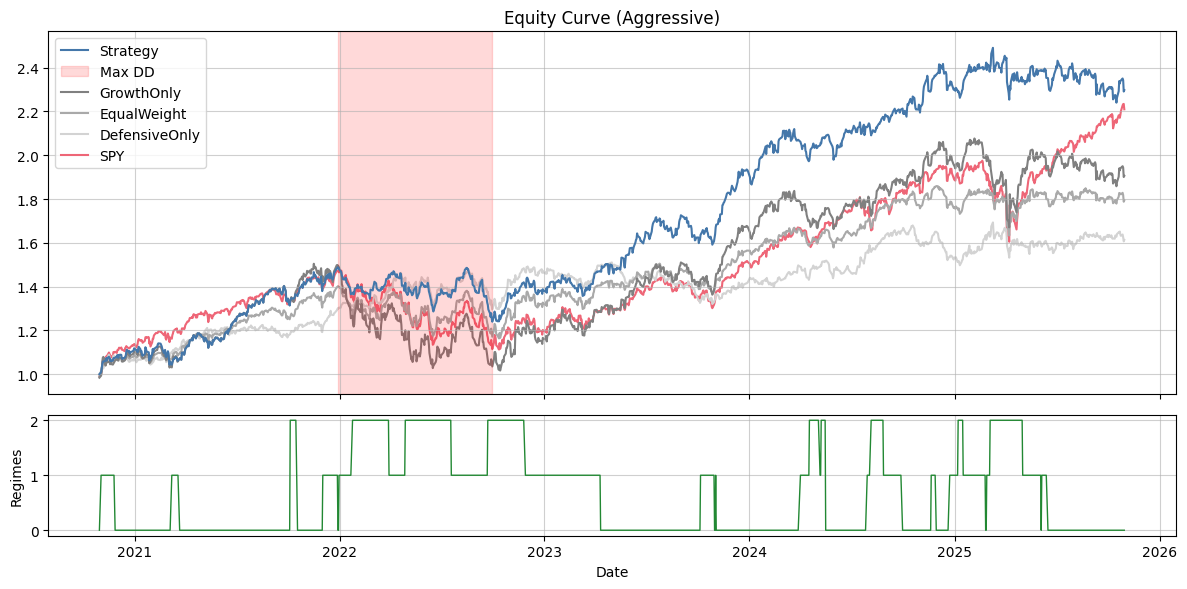

In [4]:
toolkit.plot_equity_curves("Aggressive")

In [5]:
toolkit.summary_table()

,cumulative_return,annual_return,annual_vol,sharpe,sortino,max_drawdown,hit_rate,avg_up_day,avg_down_day,skew,kurtosis
Strategy,129.7386%,18.1775%,15.1100%,1.203006,1.718739,-16.7134%,56.1753%,0.7113%,-0.7501%,-0.354654,1.134095
GrowthOnly,93.7040%,14.1975%,20.7900%,0.682899,0.996442,-32.4234%,54.1833%,0.9446%,-0.9834%,0.132492,3.874664
EqualWeight,80.9958%,12.6520%,14.0927%,0.897772,1.276296,-17.0234%,53.5458%,0.6551%,-0.6448%,-0.048665,4.247598
DefensiveOnly,61.5923%,10.1159%,12.1861%,0.830121,1.208394,-12.5564%,53.8645%,0.5756%,-0.5827%,-0.213222,1.976309
SPY,123.3195%,17.5069%,17.1587%,1.020293,1.405237,-24.4964%,54.6614%,0.7634%,-0.7690%,0.289325,9.009584


In [6]:
toolkit.average_holding_period()

,avg,min,max,count
holding_periods,,,,
"G=1.0, D=0.0",47.50,1,137,14
"G=0.5, D=0.5",18.53,1,91,19
"G=0.0, D=1.0",26.44,6,55,9


In [7]:
toolkit.monthly_returns_table()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
year,,,,,,,,,,,,,
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2384%,3.3103%,11.8215%
2021,-4.1641%,0.6143%,1.7924%,6.6980%,-0.3926%,6.4625%,6.1421%,4.5200%,-3.3714%,6.8261%,-1.0081%,5.0369%,32.2389%
2022,-5.7186%,-0.7623%,4.1739%,-4.5577%,2.0365%,-2.6071%,5.1014%,-4.1832%,-9.9589%,10.2783%,5.1016%,-3.8745%,-6.6069%
2023,3.6023%,-3.1772%,5.2162%,2.9756%,2.9341%,6.8077%,2.7844%,0.8663%,-5.0941%,-0.0771%,13.8576%,4.5045%,39.7832%
2024,3.8856%,4.0938%,-0.8082%,-1.8567%,-1.7146%,5.6929%,1.3850%,2.1177%,1.2587%,-0.8278%,7.8790%,-2.6938%,19.3510%
2025,3.4078%,1.3692%,1.6210%,-3.9272%,1.1890%,0.2847%,-0.8071%,0.5188%,-3.4568%,-0.2545%,NaN,NaN,-0.2865%


In [8]:
toolkit.drawdown_table(top_n=5)

,start,trough,recovery,depth,time_to_trough,recovery_days,duration
rank,,,,,,,
33,2021-12-30,2022-09-30,2023-04-13,-16.7134%,274,195.0,469.0
71,2025-03-11,2025-10-16,NaT,-10.0542%,219,NaN,NaN
8,2021-02-16,2021-03-04,2021-04-08,-8.5760%,16,35.0,51.0
43,2023-09-05,2023-10-27,2023-11-10,-7.7924%,52,14.0,66.0
56,2024-03-22,2024-04-16,2024-07-05,-6.9345%,25,80.0,105.0


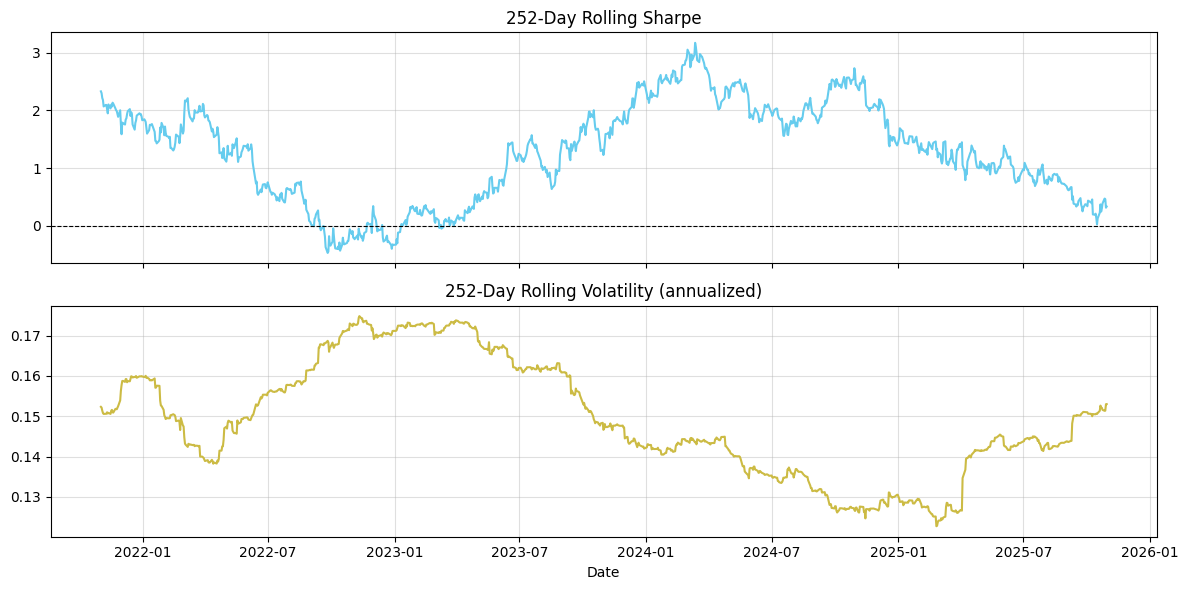

In [9]:
toolkit.plot_rolling_metrics(252)

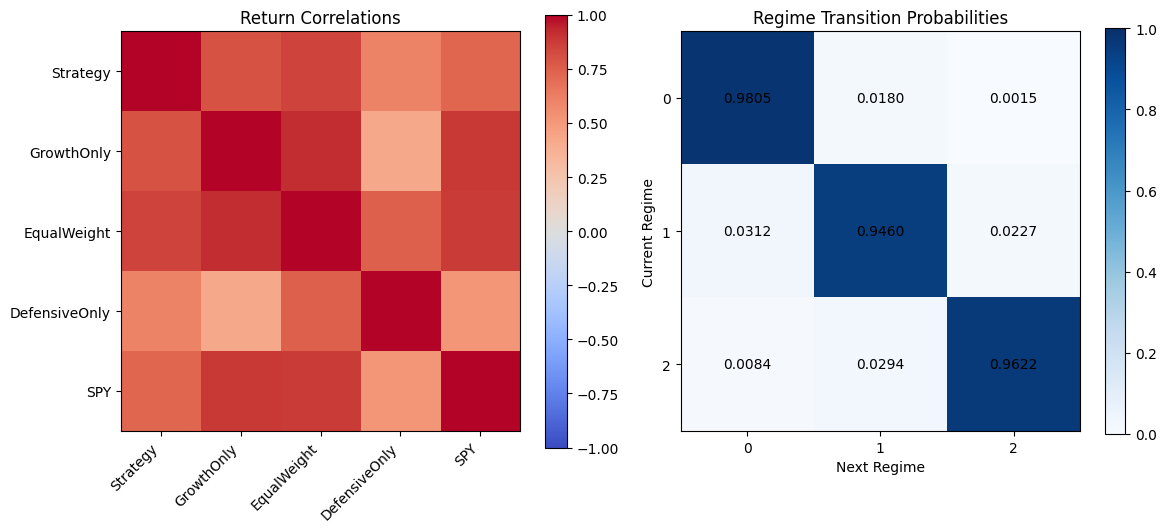

In [10]:
toolkit.plot_correlation_and_transitions()

### Conservative Strategy

In [11]:
conservative = strategy.backtest(
    allocations={
        0: {"growth": 1.0, "defensive": 0.0},
        1: {"growth": 0.0, "defensive": 1.0},
        2: {"growth": 0.0, "defensive": 1.0},
    },
)

toolkit = RegimePerformanceToolkit(conservative)
toolkit.show_basic_info()

Start date: 2020-10-30
End date:   2025-10-30
Duration:   1826 

# of points in cluster 0 : 666
# of points in cluster 1 : 352
# of points in cluster 2 : 238


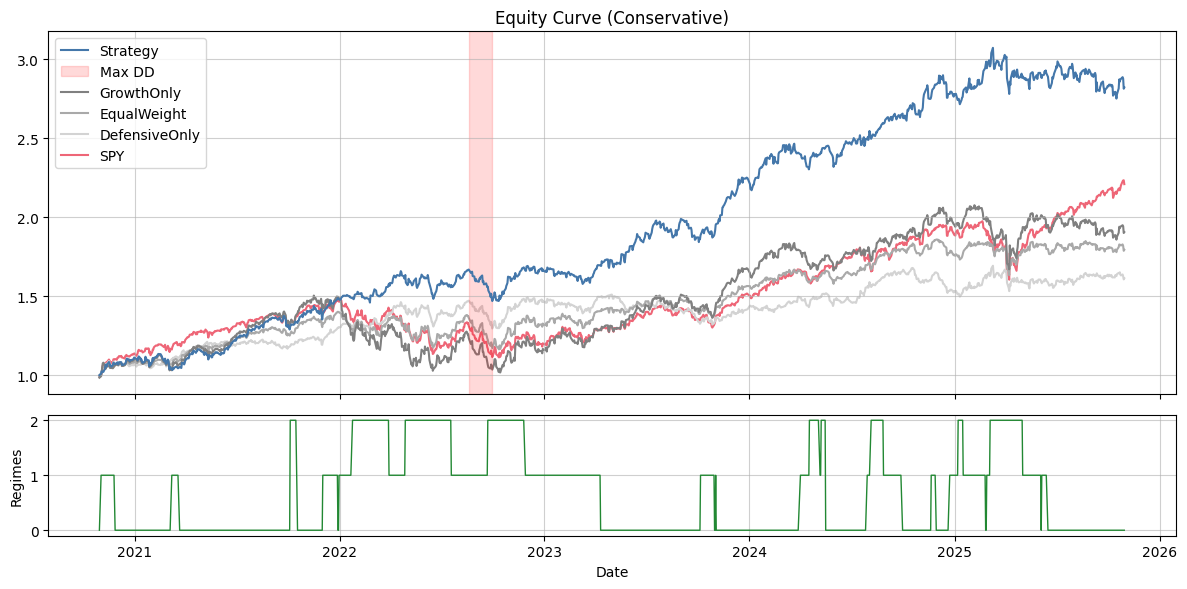

In [12]:
toolkit.plot_equity_curves("Conservative")

In [13]:
toolkit.summary_table()

,cumulative_return,annual_return,annual_vol,sharpe,sortino,max_drawdown,hit_rate,avg_up_day,avg_down_day,skew,kurtosis
Strategy,182.2319%,23.1630%,14.6758%,1.578315,2.256543,-11.9491%,56.4940%,0.7038%,-0.7140%,-0.346859,1.236800
GrowthOnly,93.7040%,14.1975%,20.7900%,0.682899,0.996442,-32.4234%,54.1833%,0.9446%,-0.9834%,0.132492,3.874664
EqualWeight,80.9958%,12.6520%,14.0927%,0.897772,1.276296,-17.0234%,53.5458%,0.6551%,-0.6448%,-0.048665,4.247598
DefensiveOnly,61.5923%,10.1159%,12.1861%,0.830121,1.208394,-12.5564%,53.8645%,0.5756%,-0.5827%,-0.213222,1.976309
SPY,123.3195%,17.5069%,17.1587%,1.020293,1.405237,-24.4964%,54.6614%,0.7634%,-0.7690%,0.289325,9.009584


In [14]:
toolkit.average_holding_period()

,avg,min,max,count
holding_periods,,,,
"G=1.0, D=0.0",47.50,1,137,14
"G=0.0, D=1.0",45.38,1,319,13


In [15]:
toolkit.monthly_returns_table()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
year,,,,,,,,,,,,,
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6261%,3.3103%,11.1889%
2021,-4.1641%,0.6143%,0.4276%,6.6980%,-0.3926%,6.4625%,6.1421%,4.5200%,-3.3714%,6.8261%,-1.0081%,7.0725%,32.9943%
2022,2.3429%,-0.7623%,4.2637%,1.3044%,2.0365%,-2.6071%,3.4532%,-2.2100%,-7.8648%,10.2783%,4.2037%,-1.6254%,12.3308%
2023,-0.4425%,-2.7023%,3.0744%,4.3305%,2.9341%,6.8077%,2.7844%,0.8663%,-5.0941%,1.2826%,13.3657%,4.5045%,35.2131%
2024,3.8856%,4.0938%,-0.8082%,-1.0449%,-1.8167%,5.6929%,0.6491%,5.0867%,1.5280%,-0.8278%,7.8215%,-2.1088%,23.8112%
2025,1.1166%,5.6526%,1.9470%,-3.9272%,0.1591%,0.8609%,-0.8071%,0.5188%,-3.4568%,-0.2545%,NaN,NaN,1.4925%


In [16]:
toolkit.drawdown_table(top_n=5)

,start,trough,recovery,depth,time_to_trough,recovery_days,duration
rank,,,,,,,
44,2022-08-22,2022-09-30,2022-11-22,-11.9491%,39,53.0,92.0
43,2022-04-21,2022-06-17,2022-08-16,-10.5788%,57,60.0,117.0
92,2025-03-11,2025-10-16,NaT,-10.4581%,219,NaN,NaN
7,2021-02-16,2021-03-09,2021-04-13,-8.9786%,21,35.0,56.0
59,2023-09-05,2023-10-03,2023-11-10,-7.3690%,28,38.0,66.0


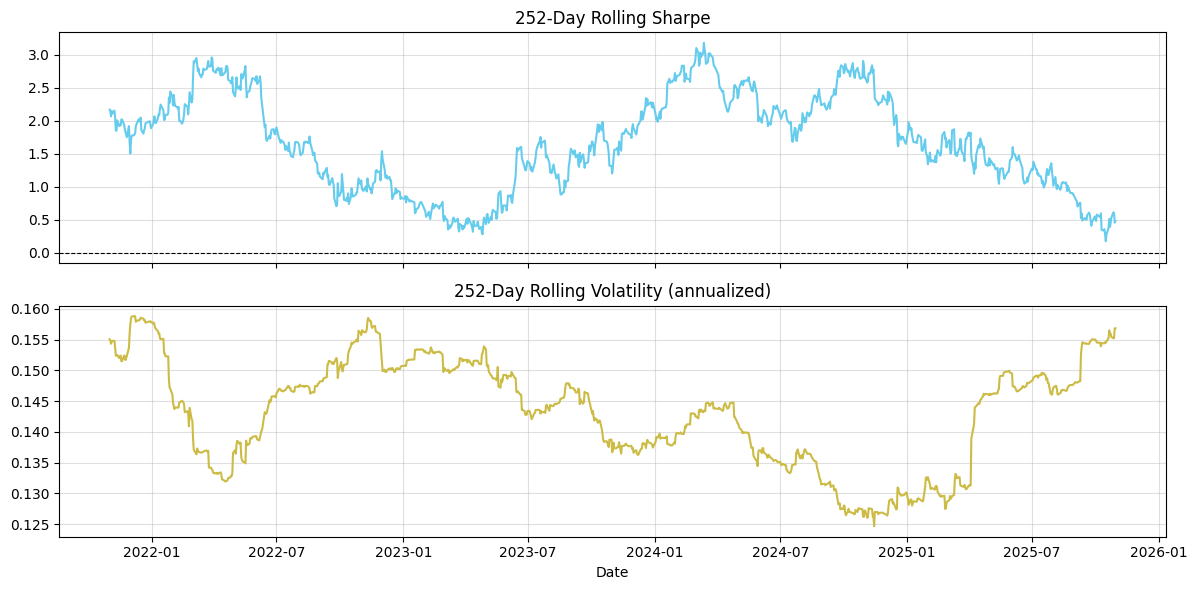

In [17]:
toolkit.plot_rolling_metrics(252)

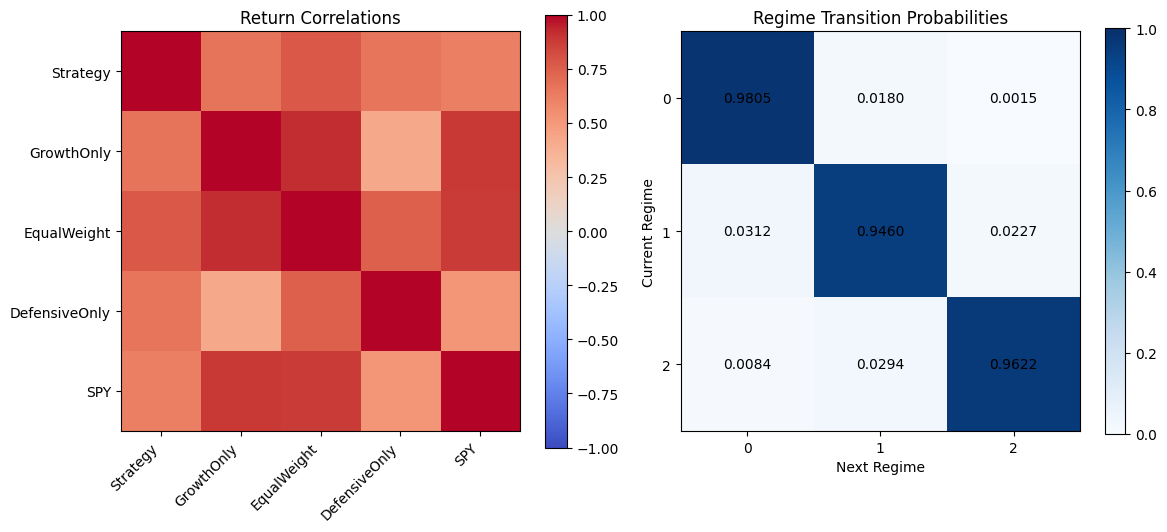

In [18]:
toolkit.plot_correlation_and_transitions()

## Grid Search for Hyperparameter Tunning

In [ ]:
df = RegimeRotationStrategy.grid_search_regimes(
    growth,
    defensive,
    start_date="2019-05-09",
    windows=(36, 72, 120, 240, 360, 480),
    steps=(6, 12, 24, 48),
    refits=(12, 24, 48, 96, 120),
)
df